In [48]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm 
%matplotlib inline 

from scipy.stats import gaussian_kde
from numpy.linalg import norm

##### Laboratory 4
##### ------------

Построить согласно описанному ниже алгоритму имитационную модель, 
позволяющую рассчитать вероятность блокировки линии прямой видимости, и сравнить 
полученную характеристику с результатами математической модели. 
1. В  квадратной  области  со  стороной  А согласно  точечному  Пуассоновскому 
процессу с плотностью q  разместить объекты (окружности с фиксированным 
радиусом r), которые могут заблокировать линию прямой видимости между двумя 
точками, размещенными на расстоянии x  друг от друга внутри обозначенной 
области. Проверить блокирует ли хотя бы один объект линию прямой видимости. 
2. Количество  блокирующих  объектов  определяется  согласно  распределению 
Пуассона с параметром qA2, а объекты вбрасываются независимо друг от друга. 
При этом центры блокирующих объектов должны быть распределены равномерно 
внутри рассматриваемой области. 
На основе описанного выше алгоритма получить 1000 реализаций факта блокировки 
линии  прямой  видимости  и  рассчитать  вероятность  блокировки  линии  прямой 
видимости  в  поле  блокирующих  объектов.  Полученный  результат  сравнить  с 
результатами математической модели



    A - размер зоны
    q - lambda для распределения пуассона
    cir_r - радиус круга 
    dist - расстояние между объектами

In [49]:
guard_size = 10
poisson_lam_block = 0.3
cir_r = 0.5
dist_tx_rx = 3
# list_point = np.array

<h4> Drawing first circle </h4>

In [50]:
def plot_circle(x,y,r):
    angels = np.linspace(0,2*np.pi,50)
    cirX = x+r*np.cos(angels)
    cirY = y+r*np.sin(angels)
    plt.plot(cirX, cirY, "aqua")


<h4> Initializing Poisson  </h4>

In [51]:
def poisson_point_process(lambda0 , area_size):
    Number_block = np.random.poisson(lambda0 * area_size**2)
    x = np.random.uniform(0 , area_size , size = Number_block)
    y = np.random.uniform(0 , area_size , size = Number_block)
    return x,y


<h4> Rectangles around the lane(прямая видимости) 

    Using angles we calculate sides for our rectangle, by sin and cos of angle between two sides.


 </h4>



In [52]:
def draw_rect(x1,y1,x2,y2,angle):
    diff_angle = 2*np.pi - angle
    reverse_angle = np.pi/2 - diff_angle
    opp_angle = reverse_angle + np.pi
    xA = x1 + cir_r * np.cos(opp_angle)
    yA = y1 + cir_r * np.sin(opp_angle)
    xB = x1 + cir_r * np.cos(reverse_angle)
    yB = y1 + cir_r * np.sin(reverse_angle)
    xC = x2 + cir_r * np.cos(reverse_angle)
    yC = y2 + cir_r * np.sin(reverse_angle)
    xD = x2 + cir_r * np.cos(opp_angle)
    yD = y2 + cir_r * np.sin(opp_angle)
    
    return xA, yA, xB, yB, xC, yC, xD, yD
  

<h4> Check distance

    Vector or matrix form of distance using norm()

    We calculate crossing of the events



  </h4>

In [53]:
def check_dist(a,b,c):
    ca = (c-a) / norm(c-a)
    ba = (b-a) / norm(b-a)
    cb = (c-b) / norm(c-b)
    ab = (a-b) / norm(a-b)
    
    if np.arccos(np.dot(ca,ba)) > 1:
        return norm(c-a)
    if np.arccos(np.dot(cb,ab)) > 1:
        return norm(c-b)
    return norm(np.cross(a-b, a-c)) / norm(b-a)

<h4> Check if they cross  </h4>

In [54]:
def iscrossing():
    for i in range(len(x)):
        if np.round(check_dist(np.array([x1,y1]),np.array([x2,y2]),np.array([x[i], y[i]])), 1) <= cir_r:
            return True
        

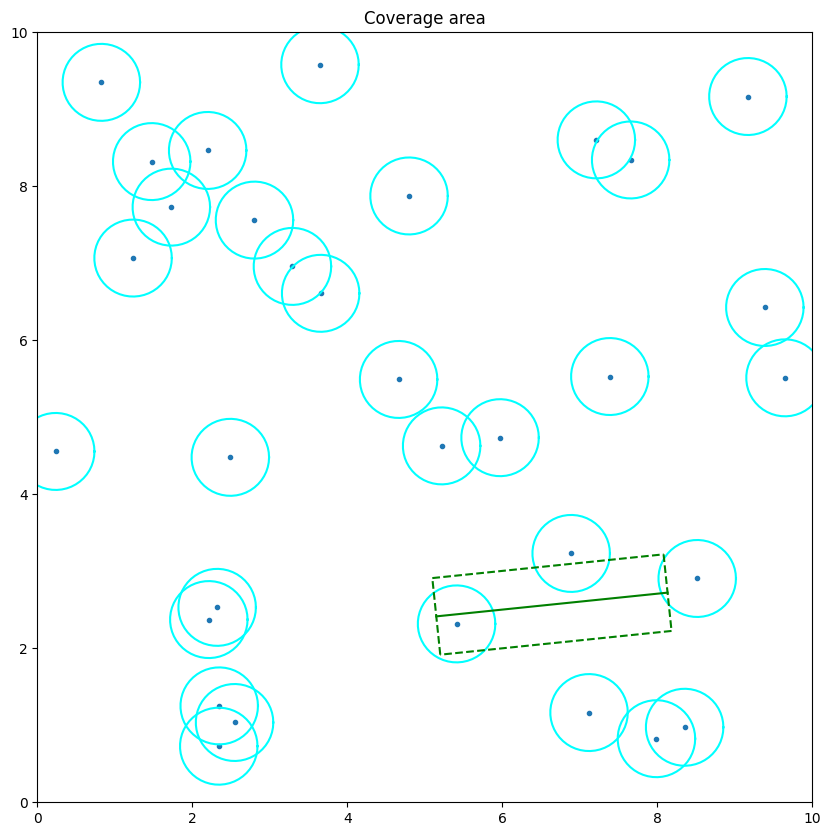

In [62]:
# circle centers
x,y = poisson_point_process(poisson_lam_block, guard_size)

rand = np.random

# line angle 
angle = rand.uniform(0, 2*np.pi)

# line coordinatess
x1,y1 = rand.uniform(0, guard_size), rand.uniform(0, guard_size)
x2 = x1 + dist_tx_rx * np.cos(angle)
y2 = y1 + dist_tx_rx * np.sin(angle)

# rectangle coords 
xA, yA, xB, yB, xC, yC, xD, yD = draw_rect(x1,y1,x2,y2,angle)

plt.figure(figsize=(10,10))
plt.title("Coverage area")
# plot circles
plt.plot(x,y,".")
for i in range(len(x)):
    plot_circle(x[i], y[i], cir_r)

# plot line
plt.plot([x1,x2], [y1,y2], "-g")

# plot rect
plt.plot([xA, xB], [yA, yB], "--g")
plt.plot([xB, xC], [yB, yC], "--g")
plt.plot([xC, xD], [yC, yD], "--g")
plt.plot([xD, xA], [yD, yA], "--g")
plt.xlim(0,guard_size)
plt.ylim(0,guard_size)
plt.show()

<h4> Check if blocked  </h4>

In [56]:
if iscrossing():
    print("Blocked")
else:
    print("Free")

Blocked


<h4> Check based on 1000 realizations  </h4>

In [57]:
cnt = 0
N = 1000
for i in range(N):
    # circle cents
    x,y = poisson_point_process(poisson_lam_block, guard_size)

    # line angel 
    angle = np.random.uniform(0, 2*np.pi)

    # line coords
    x1,y1 = np.random.uniform(0, guard_size), np.random.uniform(0, guard_size)
    x2 = x1 + dist_tx_rx * np.cos(angle)
    y2 = y1 + dist_tx_rx * np.sin(angle)
    
    if iscrossing():
        cnt += 1
print(f" Probability is {cnt/1000}")

 Probability is 0.631


<h4> Theoretical probability

    Calculated based on analytical formula


  </h4>

In [58]:
S = 2 * cir_r * dist_tx_rx
l = poisson_lam_block * S
prob = 1 - np.exp(-l)
print(f"Theoretical probability {prob}")

Theoretical probability 0.5934303402594008
